# I. Import Packages

In [228]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# II. Read Datasets

In [354]:
os.chdir('/Users/wangyixuan/Desktop/Marketing Analytics/Assignments/Final')
df1 = pd.read_csv('subscribers.csv')
df2 = pd.read_csv('channel_spend_graduate.csv')

In [355]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192459 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   attribution_technical         227628 non-null  object 
 10  attribution_survey            224984 non-null  object 
 11  op_sys                        214253 non-null  object 
 12  months_per_bill_period        227628 non-nul

In [356]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   channel    40 non-null     object
 1   date       40 non-null     int64 
 2   spend_AED  40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


# III. Customer Segmentation (Clustering)

In [ ]:
a1 = df1.copy()

## 1. Data Cleaning

In [453]:
clustering_new = a1[['subid', 'preferred_genre', 'intended_use', 'weekly_consumption_hour', 'age', 'male_TF']]
clustering_no_age = clustering_new.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = False)
clustering_no_age

,subid,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF
1,23383224,comedy,access to exclusive content,22.951579,70.0,False
2,26844789,regional,replace OTT,36.001186,25.0,True
3,29417030,drama,replace OTT,20.051667,30.0,False
4,26723159,comedy,replace OTT,22.951579,28.0,False
5,24810928,comedy,access to exclusive content,20.051667,70.0,False
...,...,...,...,...,...,...
227622,25835684,drama,access to exclusive content,24.401536,43.0,False
227623,21434712,comedy,supplement OTT,28.751405,38.0,False
227624,25843074,comedy,replace OTT,27.301448,49.0,False
227625,24799085,comedy,access to exclusive content,31.651317,45.0,False


In [454]:
clustering = clustering_no_age[(clustering_no_age.age >= 10) & (clustering_no_age.age <= 80)]
clustering

,subid,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF
1,23383224,comedy,access to exclusive content,22.951579,70.0,False
2,26844789,regional,replace OTT,36.001186,25.0,True
3,29417030,drama,replace OTT,20.051667,30.0,False
4,26723159,comedy,replace OTT,22.951579,28.0,False
5,24810928,comedy,access to exclusive content,20.051667,70.0,False
...,...,...,...,...,...,...
227622,25835684,drama,access to exclusive content,24.401536,43.0,False
227623,21434712,comedy,supplement OTT,28.751405,38.0,False
227624,25843074,comedy,replace OTT,27.301448,49.0,False
227625,24799085,comedy,access to exclusive content,31.651317,45.0,False


## 2. Convert Dummy Variables

In [455]:
dummy1 = pd.get_dummies(clustering['preferred_genre'])
dummy1

,comedy,drama,international,other,regional
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
227622,0,1,0,0,0
227623,1,0,0,0,0
227624,1,0,0,0,0
227625,1,0,0,0,0


In [456]:
dummy2 = pd.get_dummies(clustering['intended_use'])
dummy2

,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
227622,1,0,0,0,0,0,0
227623,0,0,0,0,0,0,1
227624,0,0,0,0,0,1,0
227625,1,0,0,0,0,0,0


In [457]:
dummy3 = pd.get_dummies(clustering['male_TF'])
dummy3

,False,True
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
...,...,...
227622,1,0
227623,1,0
227624,1,0
227625,1,0


In [458]:
clustering = pd.concat([clustering, dummy1, dummy2, dummy3], axis = 1)
clustering.head()

,subid,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,False,True
1,23383224,comedy,access to exclusive content,22.951579,70.0,False,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,26844789,regional,replace OTT,36.001186,25.0,True,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,29417030,drama,replace OTT,20.051667,30.0,False,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,26723159,comedy,replace OTT,22.951579,28.0,False,1,0,0,0,0,0,0,0,0,0,1,0,1,0
5,24810928,comedy,access to exclusive content,20.051667,70.0,False,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [459]:
clustering.drop(columns = ['subid'], inplace = True)
clustering.drop(columns = ['preferred_genre'], inplace = True)
clustering.drop(columns = ['intended_use'], inplace = True)
clustering.drop(columns = ['male_TF'], inplace = True)

clustering.head()

,weekly_consumption_hour,age,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,False,True
1,22.951579,70.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,36.001186,25.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,20.051667,30.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,22.951579,28.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
5,20.051667,70.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


## 3. Run GMM Model

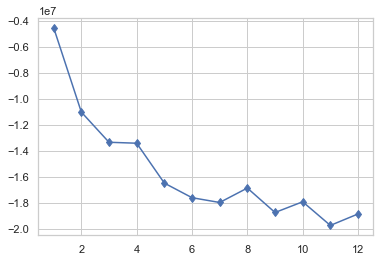

In [460]:
## Using bic measure to find ideal number of cluster

bic = []

for i in range(12):
    gm = GaussianMixture(
                     n_components = i+1,
                     covariance_type = 'full')
    
    gm.fit(clustering)
    bic.append(gm.bic(clustering))
    
# Look at the plots

fig = plt.figure()

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], bic, marker = "d", label = 'bic')
plt.show()

In [721]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(clustering)

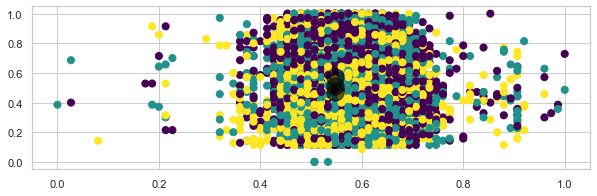

In [726]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn

gmm = GaussianMixture(n_components=3, covariance_type='full',
                      tol=0.001, reg_covar=1e-06, max_iter=100,
                      n_init=1, init_params='kmeans', weights_init=None, 
                      means_init=None, precisions_init=None, random_state=None, 
                      warm_start=False, verbose=0, verbose_interval=10).fit(X)

prediction_gmm = gmm.predict(X)
probs = gmm.predict_proba(X)

centers = np.zeros((3,17))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

plt.figure(figsize = (10,3))
plt.scatter(X[:, 0], X[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [735]:
labels = gmm.fit_predict(clustering, y = None)

clustering['lables'] = labels

In [736]:
clustering.to_csv('clustering.csv')

In [740]:
cluster0 = clustering.loc[clustering['lables'] == 0]
cluster0.describe()

,weekly_consumption_hour,age,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,False,True,lables
count,136846.000000,136846.000000,136846.000000,136846.000000,136846.000000,136846.0,136846.0,136846.000000,136846.0,136846.0,136846.0,136846.0,136846.000000,136846.000000,136846.000000,136846.000000,136846.0
mean,28.031129,46.018587,0.681087,0.276691,0.042223,0.0,0.0,0.470405,0.0,0.0,0.0,0.0,0.376679,0.152916,0.863774,0.136226,0.0
std,5.000361,14.037417,0.466057,0.447364,0.201097,0.0,0.0,0.499125,0.0,0.0,0.0,0.0,0.484555,0.359908,0.343030,0.343030,0.0
min,-32.146760,10.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,24.401536,35.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0
50%,27.301448,46.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0
75%,30.201361,57.000000,1.000000,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0
max,76.599962,80.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [741]:
cluster1 = clustering.loc[clustering['lables'] == 1]
cluster1.describe()

,weekly_consumption_hour,age,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,False,True,lables
count,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.000000,6097.0
mean,27.959957,51.809742,0.554043,0.217156,0.034443,0.166967,0.027391,0.036247,0.009513,0.023454,0.025258,0.858455,0.034279,0.012793,0.841233,0.158767,1.0
std,5.307030,13.573421,0.497112,0.412343,0.182380,0.372977,0.163232,0.186920,0.097077,0.151353,0.156922,0.348611,0.181960,0.112390,0.365488,0.365488,0.0
min,-23.447022,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,24.401536,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,27.301448,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,30.201361,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
max,66.450268,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [742]:
cluster2 = clustering.loc[clustering['lables'] == 2]
cluster2.describe()

,weekly_consumption_hour,age,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,False,True,lables
count,10926.000000,10926.000000,10926.0,10926.0,10926.0,10926.000000,10926.000000,10926.000000,10926.0,10926.0,10926.0,10926.0,10926.000000,10926.000000,10926.000000,10926.000000,10926.0
mean,28.492228,42.077064,0.0,0.0,0.0,0.249771,0.750229,0.416804,0.0,0.0,0.0,0.0,0.390445,0.192751,0.858686,0.141314,2.0
std,4.933966,12.026991,0.0,0.0,0.0,0.432900,0.432900,0.493052,0.0,0.0,0.0,0.0,0.487872,0.394477,0.348361,0.348361,0.0
min,-10.397415,18.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.0
25%,24.401536,33.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,2.0
50%,28.751405,41.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,2.0
75%,31.651317,50.000000,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,2.0
max,75.150006,80.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,2.0


# IV. Attribution and Allocation

In [466]:
a2 = df1.copy()

## 1. Calculate Average CAC

### 1.1 Aggregate spend by channel

In [467]:
ch = df2.groupby('channel')['spend_AED'].agg(sum)
ch

channel
bing         10800
display        366
facebook    113500
search      222500
youtube       8730
Name: spend_AED, dtype: int64

In [468]:
ch = ch.apply(pd.Series)
ch = ch.reset_index()
ch = ch.rename(columns = {0: 'spend'})
ch

,channel,spend
0,bing,10800
1,display,366
2,facebook,113500
3,search,222500
4,youtube,8730


### 1.2 Select data from subscribers.csv

In [491]:
S1 = a2[(a2['payment_period'] != 0)]
S1

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,...,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,year,month
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,...,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True,2020,1
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,...,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True,2020,3
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,...,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,2019,10
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,bing,...,RAKBANK,14,True,1,2020/3/17 20:15,2020/7/17 20:15,NaN,True,2020,3
6,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,...,Standard Charter,14,True,1,2020/3/4 18:30,2020/7/4 18:30,NaN,True,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,email,...,NaN,14,True,1,2020/1/15 22:43,2020/5/15 22:43,NaN,True,2020,1
227623,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,...,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True,2019,11
227624,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,google_organic,...,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True,2019,12
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,facebook,...,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True,2019,12


### 1.3 Aggregate conversions by channel

In [492]:
co = S1.groupby('attribution_technical')['subid'].count()
co

attribution_technical
affiliate                   5735
appstore                      29
bing                         608
bing_organic                 147
brand sem intent bing       1128
brand sem intent google    10656
content_greatist               1
criteo                        20
direct_mail                  105
discovery                   1672
display                      779
email                      14379
email_blast                 4115
facebook                   44447
facebook_organic            1932
google_organic              6147
influencer                    18
internal                     612
organic                    11592
other                       1079
ott                          105
pinterest                   4260
pinterest_organic             25
playstore                      7
podcast                      761
quora                         64
referral                    4278
samsung                       32
search                     16691
tv                   

In [493]:
co = co.apply(pd.Series)
co = co.reset_index()
co = co.rename(columns = {0: 'count'})

co

,attribution_technical,count
0,affiliate,5735
1,appstore,29
2,bing,608
3,bing_organic,147
4,brand sem intent bing,1128
5,brand sem intent google,10656
6,content_greatist,1
7,criteo,20
8,direct_mail,105
9,discovery,1672


### 1.4 Aggregate spend and conversion

In [494]:
dataframe = {'count': [421, 693, 25220, 11407, 618]}
count = pd.DataFrame(data = dataframe)
count

,count
0,421
1,693
2,25220
3,11407
4,618


In [495]:
CAC_a = pd.concat([ch, count], axis = 1)
CAC_a

,channel,spend,count
0,bing,10800,421
1,display,366,693
2,facebook,113500,25220
3,search,222500,11407
4,youtube,8730,618


In [496]:
CAC_a['average_CAC'] = CAC_a.apply(lambda x: x['spend']/x['count'], axis = 1)
CAC1_a = CAC_a.transpose()
CAC_a

,channel,spend,count,average_CAC
0,bing,10800,421,25.653207
1,display,366,693,0.528139
2,facebook,113500,25220,4.500397
3,search,222500,11407,19.505567
4,youtube,8730,618,14.126214


In [713]:
CAC_a.to_csv('CAC_a.csv')

## 2. Calculate Marginal CAC

### 2.1 Aggregate spend by channel

In [564]:
bing = df2.loc[df2['channel'] == 'bing']
bing = bing.reset_index()
bing.drop(['index'], axis = 1, inplace = True)
bing.drop(['channel'], axis = 1, inplace = True)

bing['marginal_spend'] = bing.spend_AED.diff()
bing['marginal_spend'][0] = 400
bing

<ipython-input-564-527e184bc845>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bing['marginal_spend'][0] = 400


,date,spend_AED,marginal_spend
0,201907,400,400.0
1,201908,900,500.0
2,201909,1000,100.0
3,201910,1100,100.0
4,201911,1300,200.0
5,201912,300,-1000.0
6,202001,2100,1800.0
7,202002,3700,1600.0


In [594]:
display = df2.loc[df2['channel'] == 'display']
display = display.reset_index()
display.drop(['index'], axis = 1, inplace = True)
display.drop(['channel'], axis = 1, inplace = True)

display['marginal_spend'] = display.spend_AED.diff()

display

,date,spend_AED,marginal_spend
0,201907,12,NaN
1,201908,20,8.0
2,201909,13,-7.0
3,201910,19,6.0
4,201911,29,10.0
5,201912,31,2.0
6,202001,148,117.0
7,202002,94,-54.0


In [566]:
facebook = df2.loc[df2['channel'] == 'facebook']
facebook = facebook.reset_index()
facebook.drop(['index'], axis = 1, inplace = True)
facebook.drop(['channel'], axis = 1, inplace = True)

facebook['marginal_spend'] = facebook.spend_AED.diff()
facebook['marginal_spend'][0] = 9000
facebook

<ipython-input-566-6af255216420>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook['marginal_spend'][0] = 9000


,date,spend_AED,marginal_spend
0,201907,9000,9000.0
1,201908,13000,4000.0
2,201909,10500,-2500.0
3,201910,17000,6500.0
4,201911,23000,6000.0
5,201912,16000,-7000.0
6,202001,11000,-5000.0
7,202002,14000,3000.0


In [567]:
search = df2.loc[df2['channel'] == 'search']
search = search.reset_index()
search.drop(['index'], axis = 1, inplace = True)
search.drop(['channel'], axis = 1, inplace = True)

search['marginal_spend'] = search.spend_AED.diff()
search['marginal_spend'][0] = 13000
search

<ipython-input-567-b000f955d670>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search['marginal_spend'][0] = 13000


,date,spend_AED,marginal_spend
0,201907,13000,13000.0
1,201908,18500,5500.0
2,201909,19000,500.0
3,201910,24000,5000.0
4,201911,25000,1000.0
5,201912,38000,13000.0
6,202001,41000,3000.0
7,202002,44000,3000.0


In [568]:
youtube = df2.loc[df2['channel'] == 'youtube']
youtube = youtube.reset_index()
youtube.drop(['index'], axis = 1, inplace = True)
youtube.drop(['channel'], axis = 1, inplace = True)

youtube['marginal_spend'] = youtube.spend_AED.diff()
youtube['marginal_spend'][0] = 90
youtube

<ipython-input-568-232c0a7d21c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['marginal_spend'][0] = 90


,date,spend_AED,marginal_spend
0,201907,90,90.0
1,201908,180,90.0
2,201909,100,-80.0
3,201910,130,30.0
4,201911,550,420.0
5,201912,900,350.0
6,202001,4360,3460.0
7,202002,2420,-1940.0


### 2.2 Select data from subscribers.csv

#### 2.2.1 Convert datetime

In [595]:
a = S1[['subid', 'attribution_technical', 'account_creation_date']].copy()
a

,subid,attribution_technical,account_creation_date
0,21724479,facebook,2020-01-24 21:44:00
1,23383224,facebook,2020-03-01 15:44:00
4,26723159,discovery,2019-10-05 12:57:00
5,24810928,bing,2020-03-03 20:15:00
6,29726122,bing,2020-02-19 18:30:00
...,...,...,...
227622,25835684,email,2020-01-01 22:43:00
227623,21434712,facebook,2019-11-17 14:12:00
227624,25843074,google_organic,2019-12-06 18:02:00
227625,24799085,facebook,2019-12-21 19:40:00


In [596]:
a['account_creation_date'] = pd.to_datetime(a['account_creation_date'])
a['year'] = a['account_creation_date'].dt.year
a['month'] = a['account_creation_date'].dt.month
a.drop(['account_creation_date'], axis = 1, inplace = True)

a

,subid,attribution_technical,year,month
0,21724479,facebook,2020,1
1,23383224,facebook,2020,3
4,26723159,discovery,2019,10
5,24810928,bing,2020,3
6,29726122,bing,2020,2
...,...,...,...,...
227622,25835684,email,2020,1
227623,21434712,facebook,2019,11
227624,25843074,google_organic,2019,12
227625,24799085,facebook,2019,12


#### 2.2.2 Bing

In [597]:
b1 = a.loc[a['attribution_technical'] == 'bing']
b1 = b1.reset_index()
b1

,index,subid,attribution_technical,year,month
0,5,24810928,bing,2020,3
1,6,29726122,bing,2020,2
2,260,21480921,bing,2020,2
3,307,22656192,bing,2020,2
4,533,27755165,bing,2020,1
...,...,...,...,...,...
603,224617,29503980,bing,2019,12
604,225259,25387925,bing,2020,1
605,225419,27886890,bing,2019,9
606,226049,26074769,bing,2019,10


In [598]:
new_b1 = b1[(b1['month'] != 3) & (b1['month'] != 4) & (b1['month'] != 5) & (b1['month'] != 6)] 
new_b1

,index,subid,attribution_technical,year,month
1,6,29726122,bing,2020,2
2,260,21480921,bing,2020,2
3,307,22656192,bing,2020,2
4,533,27755165,bing,2020,1
5,810,28350193,bing,2019,9
...,...,...,...,...,...
603,224617,29503980,bing,2019,12
604,225259,25387925,bing,2020,1
605,225419,27886890,bing,2019,9
606,226049,26074769,bing,2019,10


In [599]:
new_b1['date1'] = pd.to_datetime(new_b1.year.astype(str) + '-' + new_b1.month.astype(str))
new_b1

<ipython-input-599-95bfb7121a65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_b1['date1'] = pd.to_datetime(new_b1.year.astype(str) + '-' + new_b1.month.astype(str))


,index,subid,attribution_technical,year,month,date1
1,6,29726122,bing,2020,2,2020-02-01
2,260,21480921,bing,2020,2,2020-02-01
3,307,22656192,bing,2020,2,2020-02-01
4,533,27755165,bing,2020,1,2020-01-01
5,810,28350193,bing,2019,9,2019-09-01
...,...,...,...,...,...,...
603,224617,29503980,bing,2019,12,2019-12-01
604,225259,25387925,bing,2020,1,2020-01-01
605,225419,27886890,bing,2019,9,2019-09-01
606,226049,26074769,bing,2019,10,2019-10-01


In [600]:
b2 = new_b1.groupby('date1')['subid'].count()
b2

date1
2019-07-01     25
2019-08-01     30
2019-09-01     51
2019-10-01     53
2019-11-01     60
2019-12-01     13
2020-01-01     93
2020-02-01    181
Name: subid, dtype: int64

In [601]:
b2_new = b2.apply(pd.Series)
b2_new = b2.reset_index()

b2_new

,date1,subid
0,2019-07-01,25
1,2019-08-01,30
2,2019-09-01,51
3,2019-10-01,53
4,2019-11-01,60
5,2019-12-01,13
6,2020-01-01,93
7,2020-02-01,181


In [620]:
b = pd.concat([bing, b2_new], axis = 1)

b.drop(['date'], axis = 1, inplace = True)
b.drop(['date1'], axis = 1, inplace = True)
b.drop(['marginal_spend'], axis = 1, inplace = True)
bs = b.sort_values(by = 'spend_AED', ascending = True)
bs = bs.reset_index()
bs

,index,spend_AED,subid
0,5,300,13
1,0,400,25
2,1,900,30
3,2,1000,51
4,3,1100,53
5,4,1300,60
6,6,2100,93
7,7,3700,181


In [621]:
bs.drop(['index'], axis = 1, inplace = True)
bs['marginal_spend'] = bs.spend_AED.diff()
bs['marginal_conversion'] = bs.subid.diff()
bs['marginal_spend'][0] = 300
bs['marginal_conversion'][0] = 13
bs['marginal_CAC'] = bs['marginal_spend']/bs['marginal_conversion']

bs

<ipython-input-621-fa75b776b7c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs['marginal_spend'][0] = 300
<ipython-input-621-fa75b776b7c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs['marginal_conversion'][0] = 13


,spend_AED,subid,marginal_spend,marginal_conversion,marginal_CAC
0,300,13,300.0,13.0,23.076923
1,400,25,100.0,12.0,8.333333
2,900,30,500.0,5.0,100.000000
3,1000,51,100.0,21.0,4.761905
4,1100,53,100.0,2.0,50.000000
5,1300,60,200.0,7.0,28.571429
6,2100,93,800.0,33.0,24.242424
7,3700,181,1600.0,88.0,18.181818


In [712]:
bs.to_csv('bs.csv')

#### 2.2.3 Display

In [514]:
d1 = a.loc[a['attribution_technical'] == 'display']
d1 = d1.reset_index()
d1

,index,subid,attribution_technical,year,month
0,85,25630872,display,2020,2
1,365,26363444,display,2019,11
2,1120,25005599,display,2020,2
3,1263,27405746,display,2019,8
4,2106,21461479,display,2020,2
...,...,...,...,...,...
774,224571,28971152,display,2020,1
775,225353,20148122,display,2020,1
776,225478,25534636,display,2019,11
777,226363,21173254,display,2020,2


In [515]:
new_d1 = d1[(d1['month'] != 3) & (d1['month'] != 4) & (d1['month'] != 5) & (d1['month'] != 6)] 
new_d1

,index,subid,attribution_technical,year,month
0,85,25630872,display,2020,2
1,365,26363444,display,2019,11
2,1120,25005599,display,2020,2
3,1263,27405746,display,2019,8
4,2106,21461479,display,2020,2
...,...,...,...,...,...
774,224571,28971152,display,2020,1
775,225353,20148122,display,2020,1
776,225478,25534636,display,2019,11
777,226363,21173254,display,2020,2


In [545]:
new_d1['date1'] = pd.to_datetime(new_d1.year.astype(str) + '-' + new_d1.month.astype(str))
new_d1

<ipython-input-545-80e6a0dd1c42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d1['date1'] = pd.to_datetime(new_d1.year.astype(str) + '-' + new_d1.month.astype(str))


,index,subid,attribution_technical,year,month,date,date1
0,85,25630872,display,2020,2,2020-02-01,2020-02-01
1,365,26363444,display,2019,11,2019-11-01,2019-11-01
2,1120,25005599,display,2020,2,2020-02-01,2020-02-01
3,1263,27405746,display,2019,8,2019-08-01,2019-08-01
4,2106,21461479,display,2020,2,2020-02-01,2020-02-01
...,...,...,...,...,...,...,...
774,224571,28971152,display,2020,1,2020-01-01,2020-01-01
775,225353,20148122,display,2020,1,2020-01-01,2020-01-01
776,225478,25534636,display,2019,11,2019-11-01,2019-11-01
777,226363,21173254,display,2020,2,2020-02-01,2020-02-01


In [546]:
d2 = new_d1.groupby('date1')['subid'].count()
d2

date1
2019-07-01      7
2019-08-01     33
2019-09-01      8
2019-10-01     28
2019-11-01     65
2019-12-01     65
2020-01-01    326
2020-02-01    189
Name: subid, dtype: int64

In [547]:
d2_new = d2.apply(pd.Series)
d2_new = d2.reset_index()

d2_new

,date1,subid
0,2019-07-01,7
1,2019-08-01,33
2,2019-09-01,8
3,2019-10-01,28
4,2019-11-01,65
5,2019-12-01,65
6,2020-01-01,326
7,2020-02-01,189


In [622]:
d = pd.concat([display, d2_new], axis = 1)
d.drop(['date'], axis = 1, inplace = True)
d.drop(['date1'], axis = 1, inplace = True)
d.drop(['marginal_spend'], axis = 1, inplace = True)
ds = d.sort_values(by = 'spend_AED', ascending = True)
ds = ds.reset_index()
ds

,index,spend_AED,subid
0,0,12,7
1,2,13,8
2,3,19,28
3,1,20,33
4,4,29,65
5,5,31,65
6,7,94,189
7,6,148,326


In [623]:
ds.drop(['index'], axis = 1, inplace = True)
ds['marginal_spend'] = ds.spend_AED.diff()
ds['marginal_conversion'] = ds.subid.diff()
ds['marginal_spend'][0] = 12
ds['marginal_conversion'][0] = 7
ds['marginal_CAC'] = ds['marginal_spend']/ds['marginal_conversion']

ds

<ipython-input-623-32877a187f12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['marginal_spend'][0] = 12
<ipython-input-623-32877a187f12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['marginal_conversion'][0] = 7


,spend_AED,subid,marginal_spend,marginal_conversion,marginal_CAC
0,12,7,12.0,7.0,1.714286
1,13,8,1.0,1.0,1.000000
2,19,28,6.0,20.0,0.300000
3,20,33,1.0,5.0,0.200000
4,29,65,9.0,32.0,0.281250
5,31,65,2.0,0.0,inf
6,94,189,63.0,124.0,0.508065
7,148,326,54.0,137.0,0.394161


In [714]:
ds.to_csv('ds.csv')

#### 2.2.4 Facebook

In [520]:
f1 = a.loc[a['attribution_technical'] == 'facebook']
f1 = f1.reset_index()
f1

,index,subid,attribution_technical,year,month
0,0,21724479,facebook,2020,1
1,1,23383224,facebook,2020,3
2,8,24930568,facebook,2020,2
3,15,26874196,facebook,2020,3
4,18,29090912,facebook,2020,1
...,...,...,...,...,...
44442,227599,27161457,facebook,2019,11
44443,227607,26509361,facebook,2019,9
44444,227623,21434712,facebook,2019,11
44445,227625,24799085,facebook,2019,12


In [521]:
new_f1 = f1[(f1['month'] != 3) & (f1['month'] != 4) & (f1['month'] != 5) & (f1['month'] != 6)] 
new_f1

,index,subid,attribution_technical,year,month
0,0,21724479,facebook,2020,1
2,8,24930568,facebook,2020,2
4,18,29090912,facebook,2020,1
7,29,25575254,facebook,2020,2
8,30,21908764,facebook,2020,1
...,...,...,...,...,...
44442,227599,27161457,facebook,2019,11
44443,227607,26509361,facebook,2019,9
44444,227623,21434712,facebook,2019,11
44445,227625,24799085,facebook,2019,12


In [549]:
new_f1['date1'] = pd.to_datetime(new_f1.year.astype(str) + '-' + new_f1.month.astype(str))
new_f1

<ipython-input-549-d6b6933a930d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_f1['date1'] = pd.to_datetime(new_f1.year.astype(str) + '-' + new_f1.month.astype(str))


,index,subid,attribution_technical,year,month,date,date1
0,0,21724479,facebook,2020,1,2020-01-01,2020-01-01
2,8,24930568,facebook,2020,2,2020-02-01,2020-02-01
4,18,29090912,facebook,2020,1,2020-01-01,2020-01-01
7,29,25575254,facebook,2020,2,2020-02-01,2020-02-01
8,30,21908764,facebook,2020,1,2020-01-01,2020-01-01
...,...,...,...,...,...,...,...
44442,227599,27161457,facebook,2019,11,2019-11-01,2019-11-01
44443,227607,26509361,facebook,2019,9,2019-09-01,2019-09-01
44444,227623,21434712,facebook,2019,11,2019-11-01,2019-11-01
44445,227625,24799085,facebook,2019,12,2019-12-01,2019-12-01


In [551]:
f2 = new_f1.groupby('date1')['subid'].count()
f2

date1
2019-07-01    2058
2019-08-01    4857
2019-09-01    3754
2019-10-01    6311
2019-11-01    8497
2019-12-01    6035
2020-01-01    4103
2020-02-01    4902
Name: subid, dtype: int64

In [552]:
f2_new = f2.apply(pd.Series)
f2_new = f2.reset_index()

f2_new

,date1,subid
0,2019-07-01,2058
1,2019-08-01,4857
2,2019-09-01,3754
3,2019-10-01,6311
4,2019-11-01,8497
5,2019-12-01,6035
6,2020-01-01,4103
7,2020-02-01,4902


In [624]:
f = pd.concat([facebook, f2_new], axis = 1)
f.drop(['date'], axis = 1, inplace = True)
f.drop(['date1'], axis = 1, inplace = True)
f.drop(['marginal_spend'], axis = 1, inplace = True)
fs = f.sort_values(by = 'spend_AED', ascending = True)
fs = fs.reset_index()
fs

,index,spend_AED,subid
0,0,9000,2058
1,2,10500,3754
2,6,11000,4103
3,1,13000,4857
4,7,14000,4902
5,5,16000,6035
6,3,17000,6311
7,4,23000,8497


In [625]:
fs.drop(['index'], axis = 1, inplace = True)
fs['marginal_spend'] = fs.spend_AED.diff()
fs['marginal_conversion'] = fs.subid.diff()
fs['marginal_spend'][0] = 9000
fs['marginal_conversion'][0] = 2058
fs['marginal_CAC'] = fs['marginal_spend']/fs['marginal_conversion']

fs

<ipython-input-625-fa14e0771af0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs['marginal_spend'][0] = 9000
<ipython-input-625-fa14e0771af0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs['marginal_conversion'][0] = 2058


,spend_AED,subid,marginal_spend,marginal_conversion,marginal_CAC
0,9000,2058,9000.0,2058.0,4.373178
1,10500,3754,1500.0,1696.0,0.884434
2,11000,4103,500.0,349.0,1.432665
3,13000,4857,2000.0,754.0,2.652520
4,14000,4902,1000.0,45.0,22.222222
5,16000,6035,2000.0,1133.0,1.765225
6,17000,6311,1000.0,276.0,3.623188
7,23000,8497,6000.0,2186.0,2.744739


In [715]:
fs.to_csv('fs.csv')

#### 2.2.5 Search

In [526]:
s1 = a.loc[a['attribution_technical'] == 'search']
s1 = s1.reset_index()
s1

,index,subid,attribution_technical,year,month
0,11,21361112,search,2019,12
1,16,27648682,search,2019,10
2,34,26461912,search,2020,2
3,45,28897426,search,2020,1
4,47,27936781,search,2020,2
...,...,...,...,...,...
16686,227545,28796197,search,2019,12
16687,227580,25063603,search,2019,12
16688,227584,23142589,search,2019,11
16689,227594,25097872,search,2020,2


In [527]:
new_s1 = s1[(s1['month'] != 3) & (s1['month'] != 4) & (s1['month'] != 5) & (s1['month'] != 6)] 
new_s1

,index,subid,attribution_technical,year,month
0,11,21361112,search,2019,12
1,16,27648682,search,2019,10
2,34,26461912,search,2020,2
3,45,28897426,search,2020,1
4,47,27936781,search,2020,2
...,...,...,...,...,...
16685,227529,20585131,search,2020,2
16686,227545,28796197,search,2019,12
16687,227580,25063603,search,2019,12
16688,227584,23142589,search,2019,11


In [554]:
new_s1['date1'] = pd.to_datetime(new_s1.year.astype(str) + '-' + new_s1.month.astype(str))
new_s1

<ipython-input-554-dc496659f463>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_s1['date1'] = pd.to_datetime(new_s1.year.astype(str) + '-' + new_s1.month.astype(str))


,index,subid,attribution_technical,year,month,date,date1
0,11,21361112,search,2019,12,2019-12-01,2019-12-01
1,16,27648682,search,2019,10,2019-10-01,2019-10-01
2,34,26461912,search,2020,2,2020-02-01,2020-02-01
3,45,28897426,search,2020,1,2020-01-01,2020-01-01
4,47,27936781,search,2020,2,2020-02-01,2020-02-01
...,...,...,...,...,...,...,...
16685,227529,20585131,search,2020,2,2020-02-01,2020-02-01
16686,227545,28796197,search,2019,12,2019-12-01,2019-12-01
16687,227580,25063603,search,2019,12,2019-12-01,2019-12-01
16688,227584,23142589,search,2019,11,2019-11-01,2019-11-01


In [555]:
s2 = new_s1.groupby('date1')['subid'].count()
s2

date1
2019-07-01     457
2019-08-01    1179
2019-09-01    1309
2019-10-01    1684
2019-11-01    1866
2019-12-01    2701
2020-01-01    2862
2020-02-01    2959
Name: subid, dtype: int64

In [556]:
s2_new = s2.apply(pd.Series)
s2_new = s2.reset_index()

s2_new

,date1,subid
0,2019-07-01,457
1,2019-08-01,1179
2,2019-09-01,1309
3,2019-10-01,1684
4,2019-11-01,1866
5,2019-12-01,2701
6,2020-01-01,2862
7,2020-02-01,2959


In [626]:
s = pd.concat([search, s2_new], axis = 1)
s.drop(['date'], axis = 1, inplace = True)
s.drop(['date1'], axis = 1, inplace = True)
s.drop(['marginal_spend'], axis = 1, inplace = True)
ss = s.sort_values(by = 'spend_AED', ascending = True)
ss = ss.reset_index()
ss

,index,spend_AED,subid
0,0,13000,457
1,1,18500,1179
2,2,19000,1309
3,3,24000,1684
4,4,25000,1866
5,5,38000,2701
6,6,41000,2862
7,7,44000,2959


In [627]:
ss.drop(['index'], axis = 1, inplace = True)
ss['marginal_spend'] = ss.spend_AED.diff()
ss['marginal_conversion'] = ss.subid.diff()
ss['marginal_spend'][0] = 13000
ss['marginal_conversion'][0] = 457
ss['marginal_CAC'] = ss['marginal_spend']/ss['marginal_conversion']

ss

<ipython-input-627-d7bf80af3329>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['marginal_spend'][0] = 13000
<ipython-input-627-d7bf80af3329>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['marginal_conversion'][0] = 457


,spend_AED,subid,marginal_spend,marginal_conversion,marginal_CAC
0,13000,457,13000.0,457.0,28.446389
1,18500,1179,5500.0,722.0,7.617729
2,19000,1309,500.0,130.0,3.846154
3,24000,1684,5000.0,375.0,13.333333
4,25000,1866,1000.0,182.0,5.494505
5,38000,2701,13000.0,835.0,15.568862
6,41000,2862,3000.0,161.0,18.633540
7,44000,2959,3000.0,97.0,30.927835


In [716]:
ss.to_csv('ss.csv')

#### 2.2.6 Youtube

In [532]:
y1 = a.loc[a['attribution_technical'] == 'youtube']
y1 = y1.reset_index()
y1

,index,subid,attribution_technical,year,month
0,66,20783123,youtube,2020,1
1,565,23262869,youtube,2020,1
2,672,29236363,youtube,2020,1
3,741,21847744,youtube,2020,1
4,801,28870507,youtube,2020,1
...,...,...,...,...,...
643,226334,24458940,youtube,2020,1
644,226572,23941711,youtube,2020,3
645,226744,27848186,youtube,2020,1
646,227259,24901692,youtube,2020,1


In [533]:
new_y1 = y1[(y1['month'] != 3) & (y1['month'] != 4) & (y1['month'] != 5) & (y1['month'] != 6)] 
new_y1

,index,subid,attribution_technical,year,month
0,66,20783123,youtube,2020,1
1,565,23262869,youtube,2020,1
2,672,29236363,youtube,2020,1
3,741,21847744,youtube,2020,1
4,801,28870507,youtube,2020,1
...,...,...,...,...,...
642,225052,20748183,youtube,2019,8
643,226334,24458940,youtube,2020,1
645,226744,27848186,youtube,2020,1
646,227259,24901692,youtube,2020,1


In [558]:
new_y1['date1'] = pd.to_datetime(new_y1.year.astype(str) + '-' + new_y1.month.astype(str))
new_y1

<ipython-input-558-9484f8fba5e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_y1['date1'] = pd.to_datetime(new_y1.year.astype(str) + '-' + new_y1.month.astype(str))


,index,subid,attribution_technical,year,month,date,date1
0,66,20783123,youtube,2020,1,2020-01-01,2020-01-01
1,565,23262869,youtube,2020,1,2020-01-01,2020-01-01
2,672,29236363,youtube,2020,1,2020-01-01,2020-01-01
3,741,21847744,youtube,2020,1,2020-01-01,2020-01-01
4,801,28870507,youtube,2020,1,2020-01-01,2020-01-01
...,...,...,...,...,...,...,...
642,225052,20748183,youtube,2019,8,2019-08-01,2019-08-01
643,226334,24458940,youtube,2020,1,2020-01-01,2020-01-01
645,226744,27848186,youtube,2020,1,2020-01-01,2020-01-01
646,227259,24901692,youtube,2020,1,2020-01-01,2020-01-01


In [559]:
y2 = new_y1.groupby('date1')['subid'].count()
y2

date1
2019-07-01      1
2019-08-01     11
2019-09-01      1
2019-10-01      7
2019-11-01     36
2019-12-01     56
2020-01-01    312
2020-02-01    159
Name: subid, dtype: int64

In [560]:
y2_new = y2.apply(pd.Series)
y2_new = y2.reset_index()

y2_new

,date1,subid
0,2019-07-01,1
1,2019-08-01,11
2,2019-09-01,1
3,2019-10-01,7
4,2019-11-01,36
5,2019-12-01,56
6,2020-01-01,312
7,2020-02-01,159


In [628]:
y = pd.concat([youtube, y2_new], axis = 1)
y.drop(['date'], axis = 1, inplace = True)
y.drop(['date1'], axis = 1, inplace = True)
y.drop(['marginal_spend'], axis = 1, inplace = True)
ys = y.sort_values(by = 'spend_AED', ascending = True)
ys = ys.reset_index()
ys

,index,spend_AED,subid
0,0,90,1
1,2,100,1
2,3,130,7
3,1,180,11
4,4,550,36
5,5,900,56
6,7,2420,159
7,6,4360,312


In [629]:
ys.drop(['index'], axis = 1, inplace = True)
ys['marginal_spend'] = ys.spend_AED.diff()
ys['marginal_conversion'] = ys.subid.diff()
ys['marginal_spend'][0] = 90
ys['marginal_conversion'][0] = 1
ys['marginal_CAC'] = ys['marginal_spend']/ys['marginal_conversion']

ys

<ipython-input-629-a7c514a4f24b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ys['marginal_spend'][0] = 90
<ipython-input-629-a7c514a4f24b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ys['marginal_conversion'][0] = 1


,spend_AED,subid,marginal_spend,marginal_conversion,marginal_CAC
0,90,1,90.0,1.0,90.000000
1,100,1,10.0,0.0,inf
2,130,7,30.0,6.0,5.000000
3,180,11,50.0,4.0,12.500000
4,550,36,370.0,25.0,14.800000
5,900,56,350.0,20.0,17.500000
6,2420,159,1520.0,103.0,14.757282
7,4360,312,1940.0,153.0,12.679739


In [717]:
ys.to_csv('ys.csv')

### 2.3 Budget allocation

In [746]:
budget_per_month = df2.groupby('date')['spend_AED'].mean()
budget_per_month

date
201907     4500.4
201908     6520.0
201909     6122.6
201910     8449.8
201911     9975.8
201912    11046.2
202001    11721.6
202002    12842.8
Name: spend_AED, dtype: float64

In [748]:
budget = (11046.2 + 11721.6 + 12842.8)/3
budget

11870.200000000003

# V. Churn Analysis

In [808]:
a3 = df1.copy()
a3

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,...,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,year,month
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,...,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True,2020,1
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,...,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True,2020,3
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,...,NaN,14,False,0,NaN,NaN,NaN,True,2019,12
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,...,NaN,14,False,0,NaN,NaN,NaN,True,2020,1
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,...,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,...,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True,2019,11
227624,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,google_organic,...,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True,2019,12
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,facebook,...,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True,2019,12
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,...,Paypal,14,True,1,2020/1/31 23:58,2020/5/31 23:58,NaN,True,2020,1


## 1. Define Churn

In [810]:
a3.loc[(a3['cancel_date'].isnull() == True), 'churn'] = 1
(a3['churn'] == True).sum()

191693

## 2. Clean Dataset

In [811]:
a3.drop(['subid'], axis = 1, inplace = True)
a3.drop(['attribution_survey'], axis = 1, inplace = True)
a3.drop(['monthly_price'], axis = 1, inplace = True)
a3.drop(['account_creation_date'], axis = 1, inplace = True)
a3.drop(['trial_end_date'], axis = 1, inplace = True)
a3.drop(['payment_type'], axis = 1, inplace = True)
a3.drop(['num_trial_days'], axis = 1, inplace = True)
a3.drop(['current_sub_TF'], axis = 1, inplace = True)
a3.drop(['payment_period'], axis = 1, inplace = True)
a3.drop(['last_payment'], axis = 1, inplace = True)
a3.drop(['next_payment'], axis = 1, inplace = True)
a3.drop(['cancel_date'], axis = 1, inplace = True)
a3.drop(['trial_completed'], axis = 1, inplace = True)
a3.drop(['months_per_bill_period'], axis = 1, inplace = True)
a3.drop(['year'], axis = 1, inplace = True)
a3.drop(['month'], axis = 1, inplace = True)

a3

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,plan_type,discount_price,initial_credit_card_declined,join_fee,churn
0,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,Android,base_uae_14_day_trial,4.5141,False,NaN,1.0
1,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,NaN,base_uae_14_day_trial,4.5141,False,0.3303,1.0
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,iOS,base_uae_14_day_trial,4.5141,False,0.1101,1.0
3,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,Android,base_uae_14_day_trial,4.5141,False,0.0367,1.0
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,iOS,base_uae_14_day_trial,4.5141,False,0.0367,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,iOS,base_uae_14_day_trial,4.5141,False,0.3303,1.0
227624,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,google_organic,iOS,base_uae_14_day_trial,4.5141,False,0.3303,1.0
227625,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,facebook,iOS,base_uae_14_day_trial,4.5141,True,0.0367,1.0
227626,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,iOS,base_uae_14_day_trial,4.5141,False,NaN,1.0


In [812]:
a3['churn'] = a3['churn'].fillna(0) 
a3

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,plan_type,discount_price,initial_credit_card_declined,join_fee,churn
0,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,Android,base_uae_14_day_trial,4.5141,False,NaN,1.0
1,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,NaN,base_uae_14_day_trial,4.5141,False,0.3303,1.0
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,iOS,base_uae_14_day_trial,4.5141,False,0.1101,1.0
3,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,Android,base_uae_14_day_trial,4.5141,False,0.0367,1.0
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,iOS,base_uae_14_day_trial,4.5141,False,0.0367,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,iOS,base_uae_14_day_trial,4.5141,False,0.3303,1.0
227624,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,google_organic,iOS,base_uae_14_day_trial,4.5141,False,0.3303,1.0
227625,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,facebook,iOS,base_uae_14_day_trial,4.5141,True,0.0367,1.0
227626,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,iOS,base_uae_14_day_trial,4.5141,False,NaN,1.0


In [813]:
a3 = a3.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = False)
a3 = a3*1
a3

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,plan_type,discount_price,initial_credit_card_declined,join_fee,churn
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,1,organic,iOS,base_uae_14_day_trial,4.5141,0,0.1101,1.0
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,0,discovery,iOS,base_uae_14_day_trial,4.5141,0,0.0367,1.0
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,0,bing,Android,base_uae_14_day_trial,4.5141,0,0.3303,1.0
7,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,0,email,iOS,base_uae_14_day_trial,4.5141,0,0.0000,1.0
9,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,0,search,Android,base_uae_14_day_trial,4.5141,0,0.3303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,base,4.0,drama,access to exclusive content,27.301448,2.0,44.0,0,email,iOS,base_uae_14_day_trial,4.5141,0,0.0000,1.0
227619,base,3.0,comedy,access to exclusive content,30.201361,2.0,32.0,0,email,Android,base_uae_14_day_trial,4.5141,0,0.0000,1.0
227622,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,0,email,iOS,base_uae_14_day_trial,4.5141,0,0.0000,1.0
227623,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,0,facebook,iOS,base_uae_14_day_trial,4.5141,0,0.3303,1.0


In [814]:
(a3['churn'] == True).sum()

81124

## 3. Convert Dummy Variables

In [815]:
d1 = pd.get_dummies(a3['package_type'])
d1

,base,economy,enhanced
2,0,0,1
4,1,0,0
6,1,0,0
7,1,0,0
9,0,1,0
...,...,...,...
227616,1,0,0
227619,1,0,0
227622,1,0,0
227623,0,0,1


In [816]:
d2 = pd.get_dummies(a3['preferred_genre'])
d2

,comedy,drama,international,other,regional
2,0,0,0,0,1
4,1,0,0,0,0
6,1,0,0,0,0
7,0,1,0,0,0
9,0,1,0,0,0
...,...,...,...,...,...
227616,0,1,0,0,0
227619,1,0,0,0,0
227622,0,1,0,0,0
227623,1,0,0,0,0


In [817]:
d3 = pd.get_dummies(a3['intended_use'])
d3

,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT
2,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0
9,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
227616,1,0,0,0,0,0,0
227619,1,0,0,0,0,0,0
227622,1,0,0,0,0,0,0
227623,0,0,0,0,0,0,1


In [818]:
d4 = pd.get_dummies(a3['attribution_technical'])
d4

,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,...,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,vod,youtube
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [819]:
d5 = pd.get_dummies(a3['op_sys'])
d5

,Android,iOS
2,0,1
4,0,1
6,1,0
7,0,1
9,1,0
...,...,...
227616,0,1
227619,1,0
227622,0,1
227623,0,1


In [820]:
d6 = pd.get_dummies(a3['plan_type'])
d6

,base_eur_14_day_trial,base_uae_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,high_uae_14_day_trial,low_gbp_14_day_trial
2,0,1,0,0,0,0
4,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
9,0,1,0,0,0,0
...,...,...,...,...,...,...
227616,0,1,0,0,0,0
227619,0,1,0,0,0,0
227622,0,1,0,0,0,0
227623,0,1,0,0,0,0


In [821]:
df = pd.concat([a3, d1, d2, d3, d4, d5, d6], axis = 1)
df

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,...,vod,youtube,Android,iOS,base_eur_14_day_trial,base_uae_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,high_uae_14_day_trial,low_gbp_14_day_trial
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,1,organic,iOS,...,0,0,0,1,0,1,0,0,0,0
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,0,discovery,iOS,...,0,0,0,1,0,1,0,0,0,0
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,0,bing,Android,...,0,0,1,0,0,1,0,0,0,0
7,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,0,email,iOS,...,0,0,0,1,0,1,0,0,0,0
9,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,0,search,Android,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,base,4.0,drama,access to exclusive content,27.301448,2.0,44.0,0,email,iOS,...,0,0,0,1,0,1,0,0,0,0
227619,base,3.0,comedy,access to exclusive content,30.201361,2.0,32.0,0,email,Android,...,0,0,1,0,0,1,0,0,0,0
227622,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,0,email,iOS,...,0,0,0,1,0,1,0,0,0,0
227623,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,0,facebook,iOS,...,0,0,0,1,0,1,0,0,0,0


In [822]:
df.drop(columns = ['package_type'], inplace = True)
df.drop(columns = ['preferred_genre'], inplace = True)
df.drop(columns = ['intended_use'], inplace = True)
df.drop(columns = ['attribution_technical'], inplace = True)
df.drop(columns = ['op_sys'], inplace = True)
df.drop(columns = ['plan_type'], inplace = True)
df = df.reset_index()
df.drop(columns = ['index'], inplace = True)
df

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,discount_price,initial_credit_card_declined,join_fee,churn,base,...,vod,youtube,Android,iOS,base_eur_14_day_trial,base_uae_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,high_uae_14_day_trial,low_gbp_14_day_trial
0,3.0,36.001186,2.0,25.0,1,4.5141,0,0.1101,1.0,0,...,0,0,0,1,0,1,0,0,0,0
1,4.0,22.951579,3.0,28.0,0,4.5141,0,0.0367,1.0,1,...,0,0,0,1,0,1,0,0,0,0
2,2.0,20.051667,2.0,61.0,0,4.5141,0,0.3303,1.0,1,...,0,0,1,0,0,1,0,0,0,0
3,3.0,34.551230,2.0,23.0,0,4.5141,0,0.0000,1.0,1,...,0,0,0,1,0,1,0,0,0,0
4,3.0,28.751405,2.0,71.0,0,4.5141,0,0.3303,0.0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92933,4.0,27.301448,2.0,44.0,0,4.5141,0,0.0000,1.0,1,...,0,0,0,1,0,1,0,0,0,0
92934,3.0,30.201361,2.0,32.0,0,4.5141,0,0.0000,1.0,1,...,0,0,1,0,0,1,0,0,0,0
92935,2.0,24.401536,2.0,43.0,0,4.5141,0,0.0000,1.0,1,...,0,0,0,1,0,1,0,0,0,0
92936,3.0,28.751405,2.0,38.0,0,4.5141,0,0.3303,1.0,0,...,0,0,0,1,0,1,0,0,0,0


## 4. Run Regression Model

In [823]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [824]:
# Create Train & Test Data

df["churn"] = df["churn"].astype(int)
Y = df["churn"].values
X = df.drop(labels = ["churn"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [825]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/wangyixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [826]:
## Accuracy Score

print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8682483322573703


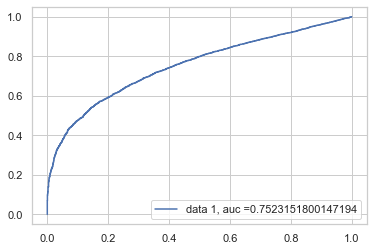

In [827]:
## ROC Curve

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc =" + str(auc))
plt.legend(loc = 4)
plt.show()

In [828]:
## Probability

preds = model.predict_proba(X)

In [829]:
preds2 = pd.DataFrame(preds)
preds2.to_csv('t.csv')